In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Deep_learning/IMDB_Sentiment_Analysis/IMDB Dataset.csv')

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data["review"][12]

'So im not a big fan of Boll\'s work but then again not many are. I enjoyed his movie Postal (maybe im the only one). Boll apparently bought the rights to use Far Cry long ago even before the game itself was even finsished. <br /><br />People who have enjoyed killing mercs and infiltrating secret research labs located on a tropical island should be warned, that this is not Far Cry... This is something Mr Boll have schemed together along with his legion of schmucks.. Feeling loneley on the set Mr Boll invites three of his countrymen to play with. These players go by the names of Til Schweiger, Udo Kier and Ralf Moeller.<br /><br />Three names that actually have made them selfs pretty big in the movie biz. So the tale goes like this, Jack Carver played by Til Schweiger (yes Carver is German all hail the bratwurst eating dudes!!) However I find that Tils acting in this movie is pretty badass.. People have complained about how he\'s not really staying true to the whole Carver agenda but we

In [5]:
data["review"][10]

'Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn\'t find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try "Brother from another planet"'

In [135]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


<Axes: xlabel='count', ylabel='sentiment'>

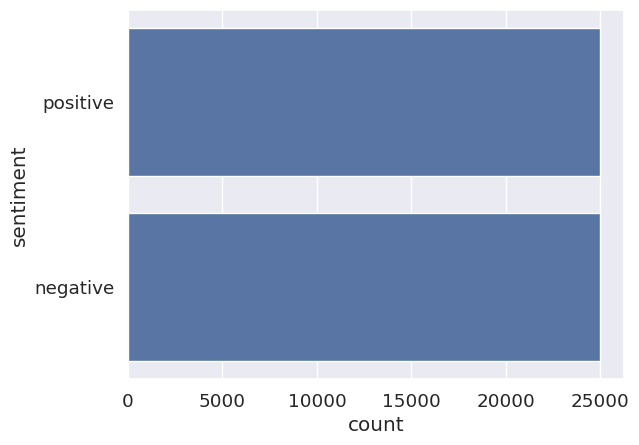

In [137]:
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(data.sentiment)

In [138]:
data.isna().sum() # Checking for any missing values


,0
review,0
sentiment,0


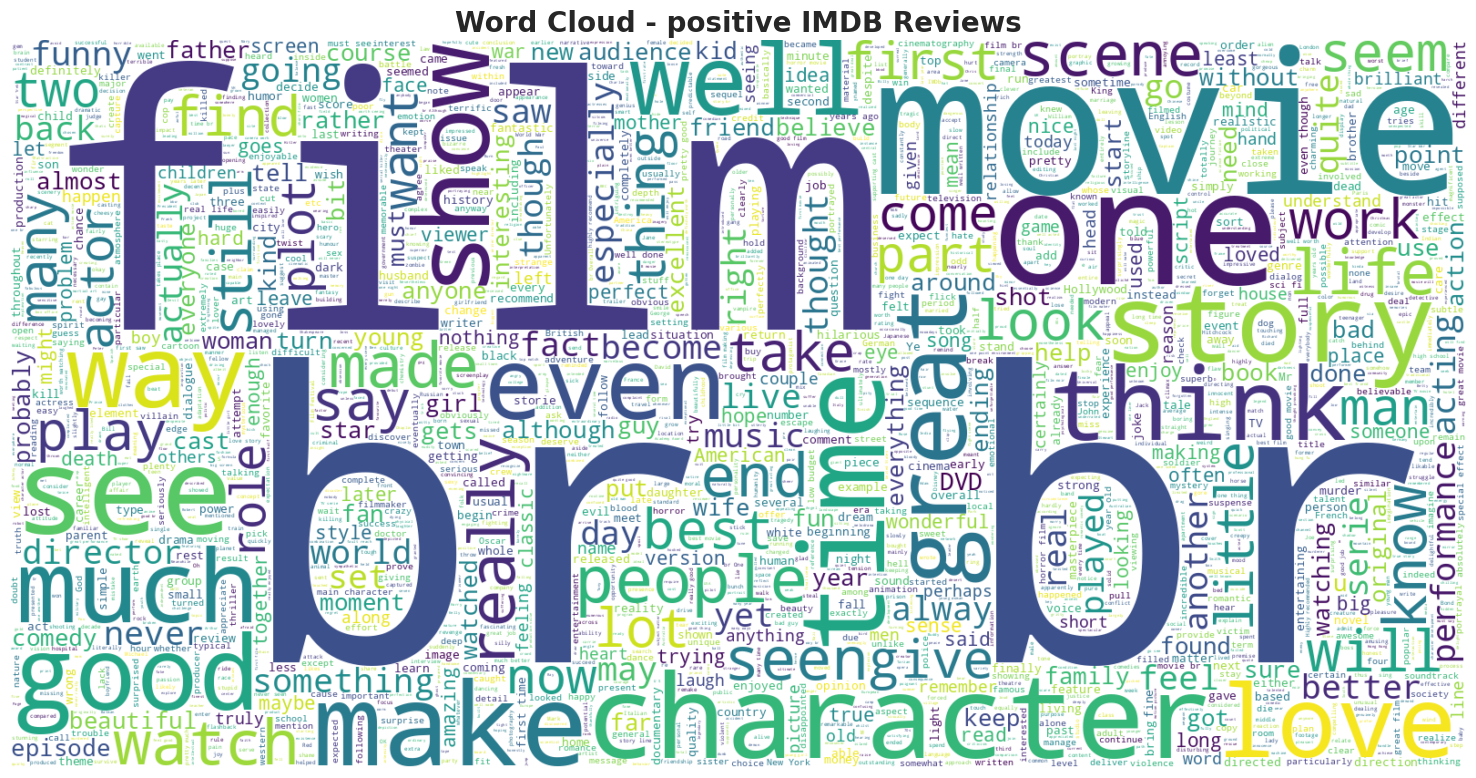

In [146]:
plt.figure(figsize=(15, 8))  # Adjusted height for widescreen format

# Generate Word Cloud for Negative Reviews
wc = WordCloud(
    max_words=2000,
    width=1600,
    height=800,
    background_color='white'
).generate(" ".join(data[data.sentiment == "positive"].review))

# Plot without grid lines or jagged interpolation
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Removes axis ticks/lines
plt.title('Word Cloud - positive IMDB Reviews', fontsize=20, weight='bold')
plt.tight_layout()
plt.show()

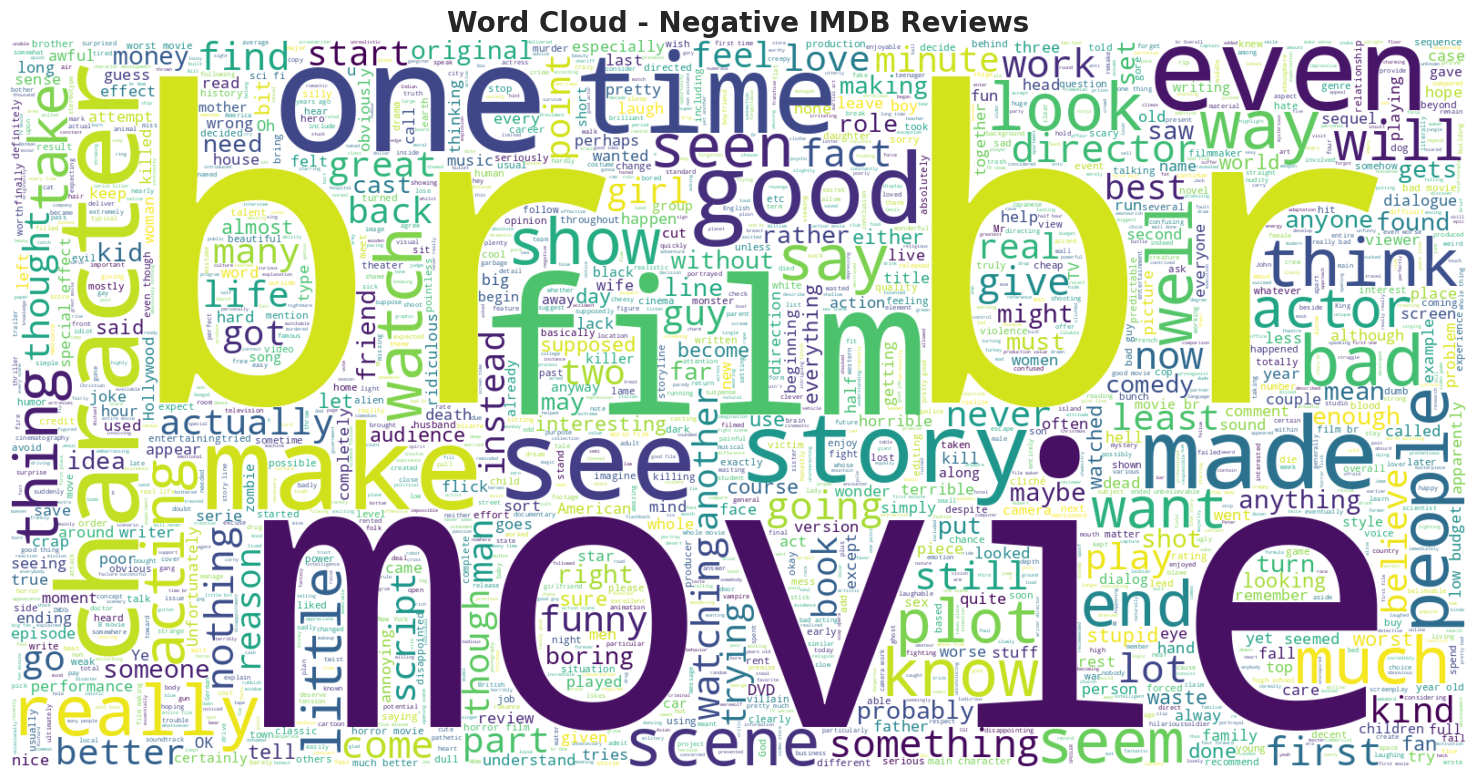

In [147]:
plt.figure(figsize=(15, 8))  # Adjusted height for widescreen format

# Generate Word Cloud for Negative Reviews
wc = WordCloud(
    max_words=2000,
    width=1600,
    height=800,
    background_color='white',
).generate(" ".join(data[data.sentiment == "negative"].review))

# Plot without grid lines or jagged interpolation
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Removes axis ticks/lines
plt.title('Word Cloud - Negative IMDB Reviews', fontsize=20, weight='bold')
plt.tight_layout()
plt.show()

In [6]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [9]:
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['review'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [10]:
len(corpus)

50000

In [11]:
corpus[10]

'phil alien one quirki film humour base around odd everyth rather actual punchlin br br first odd pretti funni movi progress find joke odd funni anymor br br low budget film that never problem pretti interest charact eventu lost interest br br imagin film would appeal stoner current partak br br someth similar better tri brother anoth planet'

In [12]:
corpus[12]

'im big fan boll work mani enjoy movi postal mayb im one boll appar bought right use far cri long ago even game even finsish br br peopl enjoy kill merc infiltr secret research lab locat tropic island warn far cri someth mr boll scheme togeth along legion schmuck feel loneley set mr boll invit three countrymen play player go name til schweiger udo kier ralf moeller br br three name actual made self pretti big movi biz tale goe like jack carver play til schweiger ye carver german hail bratwurst eat dude howev find til act movi pretti badass peopl complain realli stay true whole carver agenda saw carver first person perspect realli know look like kick br br howev storylin film beyond dement see evil mad scientist dr krieger play udo kier make genet mutat soldier gm call perform top secret research island remind spoiler vancouv reason that right palm tree instead got nice rich lumberjack wood even gone far start cri meheh cannot go wanna stay true boll shenanigan go see movi disappoint de

## **Bag of Words model**

In [82]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [83]:
X.shape

(50000, 2500)

In [84]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [85]:
y=pd.get_dummies(data['sentiment'])
y=y.iloc[:,1].values

In [86]:
y

array([ True,  True,  True, ..., False, False, False])

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [88]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [89]:
#prediction
y_pred=spam_detect_model.predict(X_test)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.84      0.84      0.84      5019
        True       0.84      0.84      0.84      4981

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_bow = accuracy_score(y_test, y_pred)
precision_bow = precision_score(y_test, y_pred)
recall_bow = recall_score(y_test, y_pred)
f1_bow = f1_score(y_test, y_pred)

print(f"Accuracy (BOW): {accuracy_bow}")
print(f"Precision (BOW): {precision_bow}")
print(f"Recall (BOW): {recall_bow}")
print(f"F1-Score (BOW): {f1_bow}")

Accuracy (BOW): 0.8384
Precision (BOW): 0.8361774744027304
Recall (BOW): 0.8388721047331319
F1-Score (BOW): 0.8375226221596622


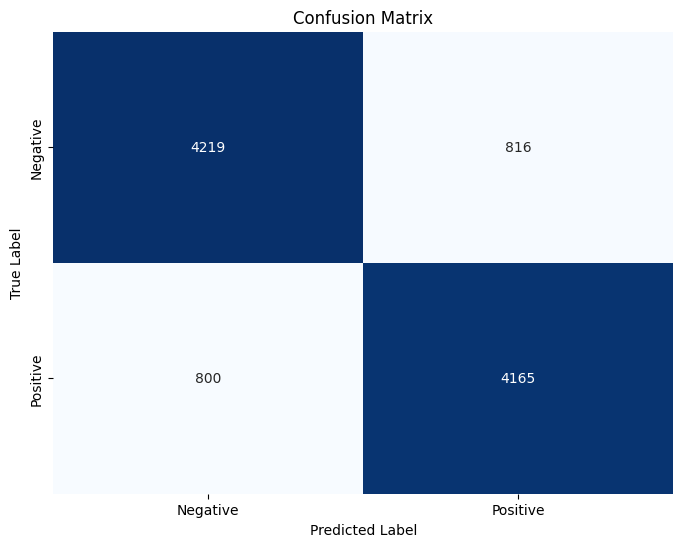

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **TFIDF Model**

In [93]:
# Creating the TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(corpus).toarray()

In [94]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [95]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [96]:
#prediction
y_pred=spam_detect_model.predict(X_test)

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.84      0.86      0.85      4908
        True       0.86      0.84      0.85      5092

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_tfidf = accuracy_score(y_test, y_pred)
precision_tfidf = precision_score(y_test, y_pred)
recall_tfidf = recall_score(y_test, y_pred)
f1_tfidf = f1_score(y_test, y_pred)

print(f"Accuracy (TFIDF): {accuracy_tfidf}")
print(f"Precision (TFIDF): {precision_tfidf}")
print(f"Recall (TFIDF): {recall_tfidf}")
print(f"F1-Score (TFIDF): {f1_tfidf}")

Accuracy (TFIDF): 0.8469
Precision (TFIDF): 0.8371956009426551
Recall (TFIDF): 0.8586102719033233
F1-Score (TFIDF): 0.8477677239733519


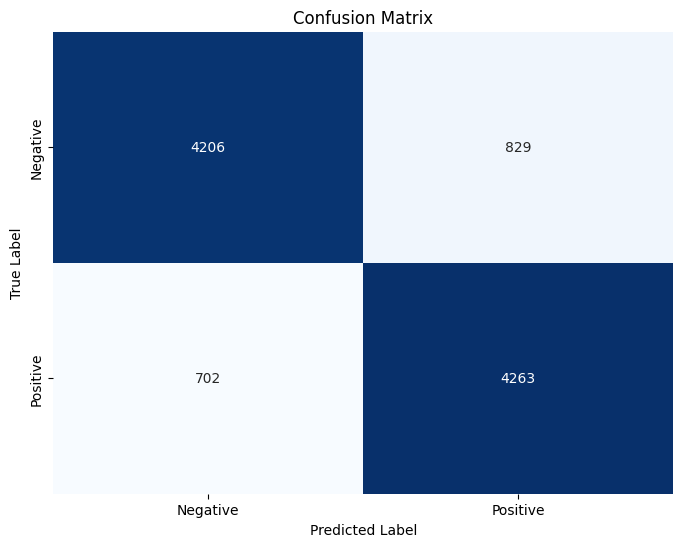

In [100]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **Word2vec Implementation**

In [44]:
# !pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; 

In [32]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

In [33]:
wv

In [34]:
vec_king = wv['king']

In [35]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [36]:
vec_king.shape

(300,)

In [39]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [40]:
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['review'][i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [102]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [103]:
corpus[0]

'one reviewer mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experi

In [104]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [105]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [106]:
words[0]

['one',
 'reviewer',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'br',
 'br',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'br',
 'br',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focus',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryan',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'never',
 'far',
 'away',
 'br',
 'br',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go',
 

In [107]:
import gensim

In [108]:
### Lets train Word2vec from scratch
model=gensim.models.Word2Vec(words,window=5,min_count=2)

In [110]:
model.corpus_count

50000

In [111]:
model.epochs

5

In [112]:
model.wv.similar_by_word('kid')

[('child', 0.7342309355735779),
 ('teenager', 0.7141185998916626),
 ('parent', 0.6765435934066772),
 ('adult', 0.6544256210327148),
 ('boy', 0.6335267424583435),
 ('teen', 0.5797957181930542),
 ('girl', 0.5674610137939453),
 ('spoiled', 0.564087986946106),
 ('mom', 0.5595433115959167),
 ('dad', 0.548972487449646)]

In [113]:
model.wv['kid'].shape

(100,)

In [114]:
from tqdm import tqdm

In [115]:
words[73]

['golf',
 'fan',
 'mean',
 'may',
 'pm',
 'movie',
 'started',
 'scene',
 'late',
 'old',
 'movie',
 'like',
 'golf',
 'however',
 'within',
 'first',
 'scene',
 'young',
 'boy',
 'harry',
 'vardon',
 'awaken',
 'voice',
 'men',
 'go',
 'outside',
 'inquire',
 'told',
 'going',
 'build',
 'golf',
 'something',
 'turned',
 'television',
 'something',
 'stirred',
 'back',
 'movie',
 'excellent',
 'see',
 'young',
 'boy',
 'man',
 'professional',
 'golf',
 'player',
 'haunted',
 'vision',
 'childhood',
 'meet',
 'true',
 'focus',
 'movie',
 'francis',
 'decision',
 'make',
 'golf',
 'meet',
 'mother',
 'father',
 'want',
 'protect',
 'class',
 'thing',
 'obvious',
 'period',
 'little',
 'eddie',
 'lowery',
 'caddy',
 'encouraging',
 'word',
 'little',
 'push',
 'instrumental',
 'francis',
 'winning',
 'want',
 'give',
 'away',
 'much',
 'super',
 'please',
 'see',
 'movie']

In [116]:
type(model.wv.index_to_key)

list

In [117]:
def get_review_vector(review_words):
    vectors = [model.wv[word] for word in review_words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

X = [get_review_vector(simple_preprocess(text)) for text in corpus]

In [118]:
corpus[0]

'one reviewer mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experi

In [119]:
X[0]

array([-1.80710465e-01,  9.86002162e-02, -1.96454346e-01, -7.96206817e-02,
       -9.02058706e-02, -4.80324388e-01,  3.03274542e-01,  3.64901751e-01,
        1.60018146e-01,  2.32612286e-02, -7.51259923e-02,  1.15016960e-01,
       -4.02230948e-01,  3.54919322e-02, -1.07743070e-01, -3.56586426e-01,
        4.80041921e-01, -4.98517722e-01, -3.59728724e-01, -3.25176358e-01,
        4.43666697e-01,  2.29962260e-01,  3.82573575e-01, -1.75511390e-01,
        2.79804021e-01,  3.71267460e-02,  2.01153588e-02,  2.60320961e-01,
       -2.64410605e-03, -5.51931299e-02, -8.88608322e-02, -1.07147515e-01,
        3.05673093e-01, -2.57905900e-01, -2.28640854e-01, -4.25732791e-01,
        2.92613447e-01, -2.67492354e-01,  3.09025824e-01, -1.02440730e-01,
       -4.35298011e-02,  1.49701998e-01,  4.02642451e-02,  3.10527861e-01,
        2.11458996e-01, -6.09486461e-01,  1.23895356e-04,  2.89639294e-01,
        1.06486902e-02,  2.74542660e-01, -1.70788482e-01, -2.26928934e-01,
        3.10794748e-02, -

In [120]:
len(X)

50000

In [121]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [122]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=100, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=100, random_state=42)

In [123]:
#prediction
y_pred = mlp.predict(X_test)

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.84      0.87      0.86      4841
        True       0.88      0.84      0.86      5159

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_w2vec = accuracy_score(y_test, y_pred)
precision_w2vec = precision_score(y_test, y_pred)
recall_w2vec = recall_score(y_test, y_pred)
f1_w2vec = f1_score(y_test, y_pred)

print(f"Accuracy (word2vec): {accuracy_w2vec}")
print(f"Precision (word2vec): {precision_w2vec}")
print(f"Recall (word2vec): {recall_w2vec}")
print(f"F1-Score (word2vec): {f1_w2vec}")

Accuracy (word2vec): 0.8584
Precision (word2vec): 0.8439620081411127
Recall (word2vec): 0.8769385699899295
F1-Score (word2vec): 0.8601343342552351


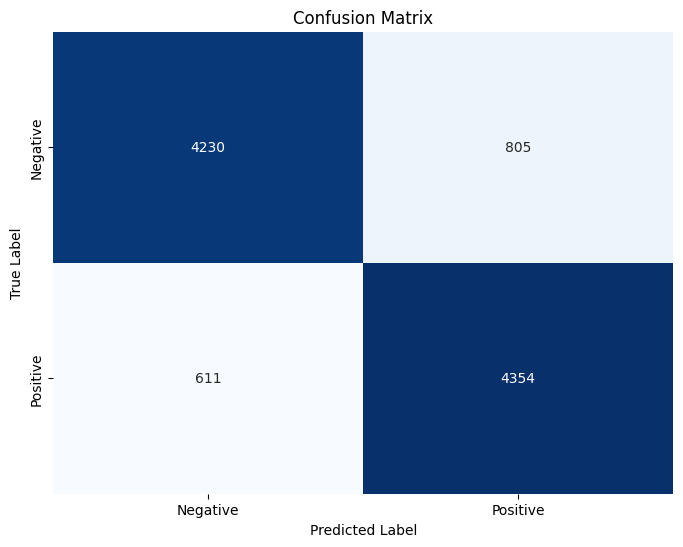

In [126]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

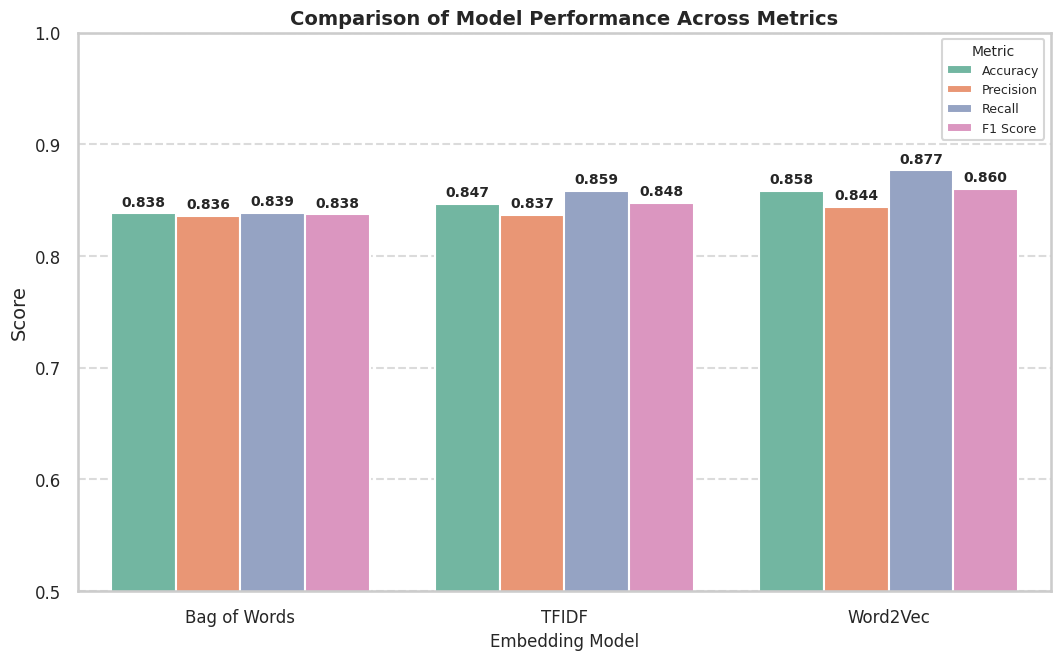

In [134]:
models = ['Bag of Words', 'TFIDF', 'Word2Vec']
accuracy = [accuracy_bow, accuracy_tfidf, accuracy_w2vec]
precision = [precision_bow, precision_tfidf, precision_w2vec]
recall = [recall_bow, recall_tfidf, recall_w2vec]
f1_score = [f1_bow, f1_tfidf, f1_w2vec]

metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

metrics_df_melted = metrics_df.melt('Model', var_name='Metric', value_name='Score')

# 🔥 Stylish Plotting
sns.set(style='whitegrid', context='talk', font_scale=1.1)

plt.figure(figsize=(11, 7))
barplot = sns.barplot(
    x='Model', y='Score', hue='Metric',
    data=metrics_df_melted,
    palette='Set2',
)

# 🏷️ Add value labels on top of each bar
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.3f', label_type='edge', padding=3, fontsize=10, weight='bold')

plt.title('Comparison of Model Performance Across Metrics', fontsize=14, weight='bold')
plt.ylabel('Score', fontsize=14)
plt.xlabel('Embedding Model', fontsize=12)
plt.ylim(0.5, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Metric', title_fontsize=10, fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()